In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import pickle
import numpy as np

from SlideRunner.dataAccess.database import Database
from lib.calculate_F1 import *


# Object detection (single shot) based on RetinaNet

## First: Object-Detection-augmented Expert Labelling (ODAEL)

### Optimize threshold value

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.6285386302605416 Threshold= 0.7900000000000003


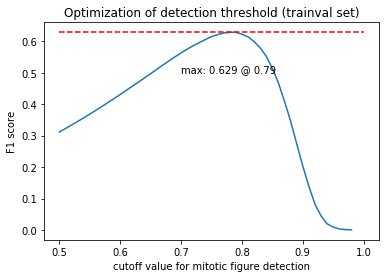

In [2]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'

resfile = 'results/RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-val-inference_results_boxes.p.bz2'

thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.5,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.5, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_ODAEL_RetinaNet.pdf')



### Evaluation on test set (using optimized threshold from validation set)

1. ODAEL dataset variant

In [3]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
resfile = 'results/RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 15478 FP: 11325 FN:  6998 F1: 0.6281783315408186
F1 score:  0.628


2. HEAEL dataset variant

In [4]:
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
resfile = 'results/RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 14986 FP: 11807 FN:  6585 F1: 0.6197171449838723
F1 score:  0.62


3. MEL dataset variant

In [5]:
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
resfile = 'results/RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 14975 FP: 11818 FN:  6576 F1: 0.6195184511004468
F1 score:  0.62


## Manual Expert Labelling 

### Optimize threshold (on train+val set)

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.6208417258560374 Threshold= 0.8000000000000003


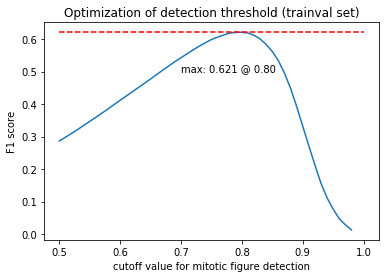

In [6]:
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'

resfile = 'results/RetinaNet-MEL-export.pth-CCMCT_MEL-val-inference_results_boxes.p.bz2'

thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.5,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.5, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_MEL_RetinaNet.pdf')




1. MEL on MEL data set

In [7]:
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
resfile = 'results/RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.80)

print('F1 score: ', np.round(F1,3))




Calculating F1 for test set of 11 files
Overall: 
TP: 14158 FP: 10931 FN:  7393 F1: 0.6071183533447685
F1 score:  0.607


2. MEL on ODAEL data set variant

In [8]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
resfile = 'results/RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.80)

print('F1 score: ', np.round(F1,3))





Calculating F1 for test set of 11 files
Overall: 
TP: 14653 FP: 10445 FN:  7823 F1: 0.6160087442720814
F1 score:  0.616


In [9]:
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
resfile = 'results/RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.80)

print('F1 score: ', np.round(F1,3))





Calculating F1 for test set of 11 files
Overall: 
TP: 14171 FP: 10918 FN:  7400 F1: 0.6074153450492927
F1 score:  0.607


## Hard Example Augmented Expert Labelling (HEAEL) -  dataset variant

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.6062053455927717 Threshold= 0.8300000000000003


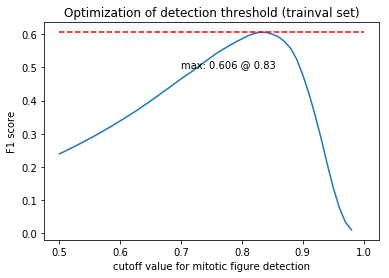

In [10]:
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'

resfile = 'results/RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-val-inference_results_boxes.p.bz2'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.5,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.5, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_HEAEL_RetinaNet.pdf')




1. HEAEL on HEAEL

In [11]:
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
resfile = 'results/RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))





Calculating F1 for test set of 11 files
Overall: 
TP: 15991 FP: 14452 FN:  5580 F1: 0.6148729188295459
F1 score:  0.615


2. HEAEL on ODAEL

In [12]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
resfile = 'results/RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))




Calculating F1 for test set of 11 files
Overall: 
TP: 16551 FP: 13902 FN:  5925 F1: 0.6254038428838633
F1 score:  0.625


3. HEAEL on MEL

In [13]:
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
resfile = 'results/RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))





Calculating F1 for test set of 11 files
Overall: 
TP: 15978 FP: 14465 FN:  5573 F1: 0.6146093780051545
F1 score:  0.615


# RetinaNet + 2nd stage (ResNet-18) classifier

## ODAEL dataset variant

### Find threshold (on train+val set)

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.8080314505919197 Threshold= 0.5400000000000003


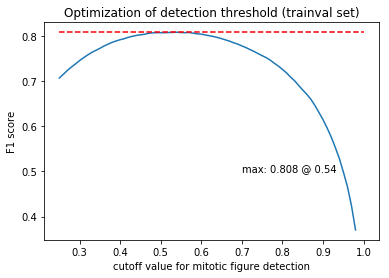

In [14]:
resfile = 'results/2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-val-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile, minthres=0.25)

import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.25,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.25, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_ODAEL_RetinaNet_2ndstage.pdf')


### Inference (on test set)

1. ODAEL on ODAEL 

In [15]:
resfile = 'results/2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.54)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 18248 FP: 3783 FN:  4228 F1: 0.8200058417776979
F1 score:  0.82


2. ODAEL on HEAEL

In [16]:
resfile = 'results/2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.54)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 17656 FP: 4372 FN:  3915 F1: 0.8099268331842473
F1 score:  0.81


3. ODAEL on MEL

In [17]:
resfile = 'results/2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.54)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 17642 FP: 4387 FN:  3909 F1: 0.8096374483708123
F1 score:  0.81


## MEL data set variant

### Find thresholds

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.746689526043899 Threshold= 0.8300000000000003


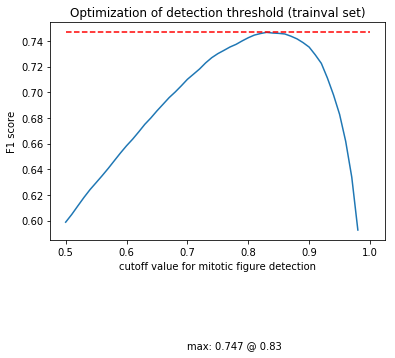

In [18]:
resfile = 'results/2ndstage_RetinaNet-MEL-export.pth-CCMCT_MEL-val-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile)

import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.5,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.5, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_MEL_RetinaNet_2ndstage.pdf')


### Inference on test set

1. MEL on MEL

In [19]:
resfile = 'results/2ndstage_RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 17467 FP: 5431 FN:  4084 F1: 0.7859344417197237
F1 score:  0.786


2. MEL on HEAEL

In [20]:
resfile = 'results/2ndstage_RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 17478 FP: 5420 FN:  4093 F1: 0.7860756931795183
F1 score:  0.786


3. MEL on ODAEL

In [21]:
resfile = 'results/2ndstage_RetinaNet-MEL-export.pth-CCMCT_MEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.83)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 18036 FP: 4869 FN:  4440 F1: 0.7948700998215112
F1 score:  0.795


## HEAEL data set variant

### Finding thresholds

Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.7173388015493278 Threshold= 0.8000000000000003


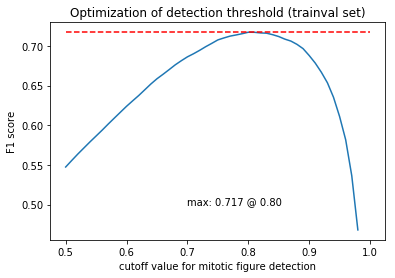

In [22]:
resfile = 'results/2ndstage_RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-val-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, resfile=resfile)

import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.5,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.5, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')

plt.savefig('results/figures/Opt_F1_CCMCT_HEAEL_RetinaNet_2ndstage.pdf')


### Inference on test set

1. HEAEL on HEAEL

In [23]:
resfile = 'results/2ndstage_RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_HEAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 16265 FP: 5223 FN:  5306 F1: 0.7554750458672984
F1 score:  0.755


2. HEAEL on MEL

In [24]:
resfile = 'results/2ndstage_RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_MEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 16256 FP: 5233 FN:  5295 F1: 0.7553903345724907
F1 score:  0.755


3. HEAEL on ODAEL

In [25]:
resfile = 'results/2ndstage_RetinaNet-HEAEL-export.pth-CCMCT_HEAEL-inference_results_boxes.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
F1, individ = calculate_F1(databasefile=databasefile, resfile=resfile, det_thres=0.79)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Overall: 
TP: 16803 FP: 4693 FN:  5673 F1: 0.7642590739561539
F1 score:  0.764
